In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\97150\\DATA\\wholesome_customers_data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


EDA

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

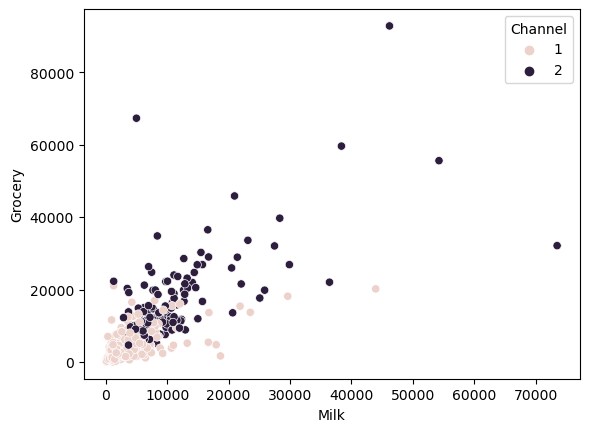

In [7]:
# Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

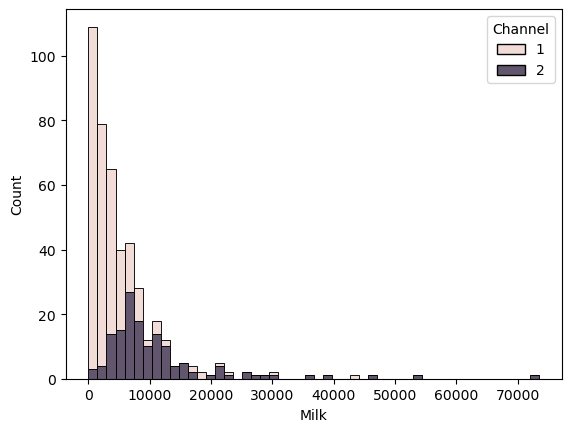

In [14]:
# create a histogram of MILK spending, colored by Channel.
sns.histplot(data=df,x='Milk',hue='Channel',multiple='stack')

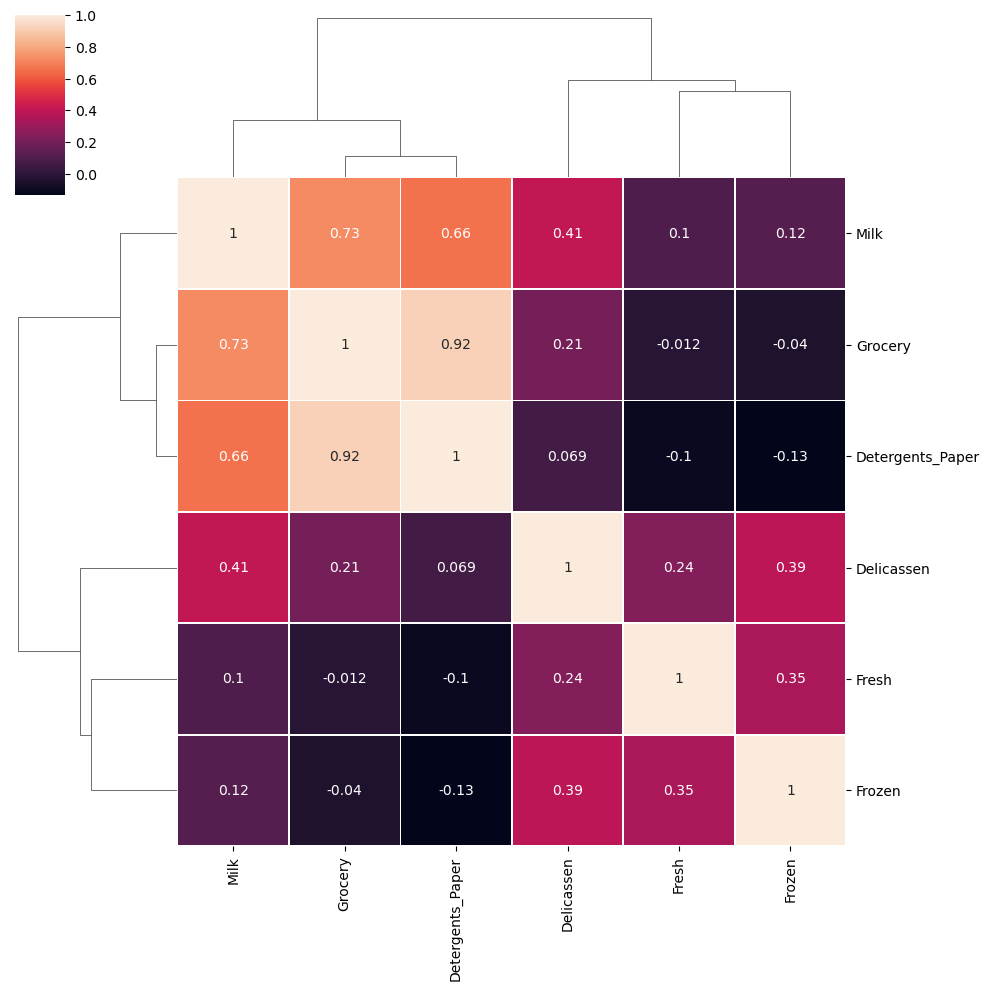

In [18]:
# Create an annotated clustermap of the correlations between spending on different cateogires.

sns.clustermap(df.drop(['Channel','Region'],axis=1).corr(),lw=.5,annot=True)

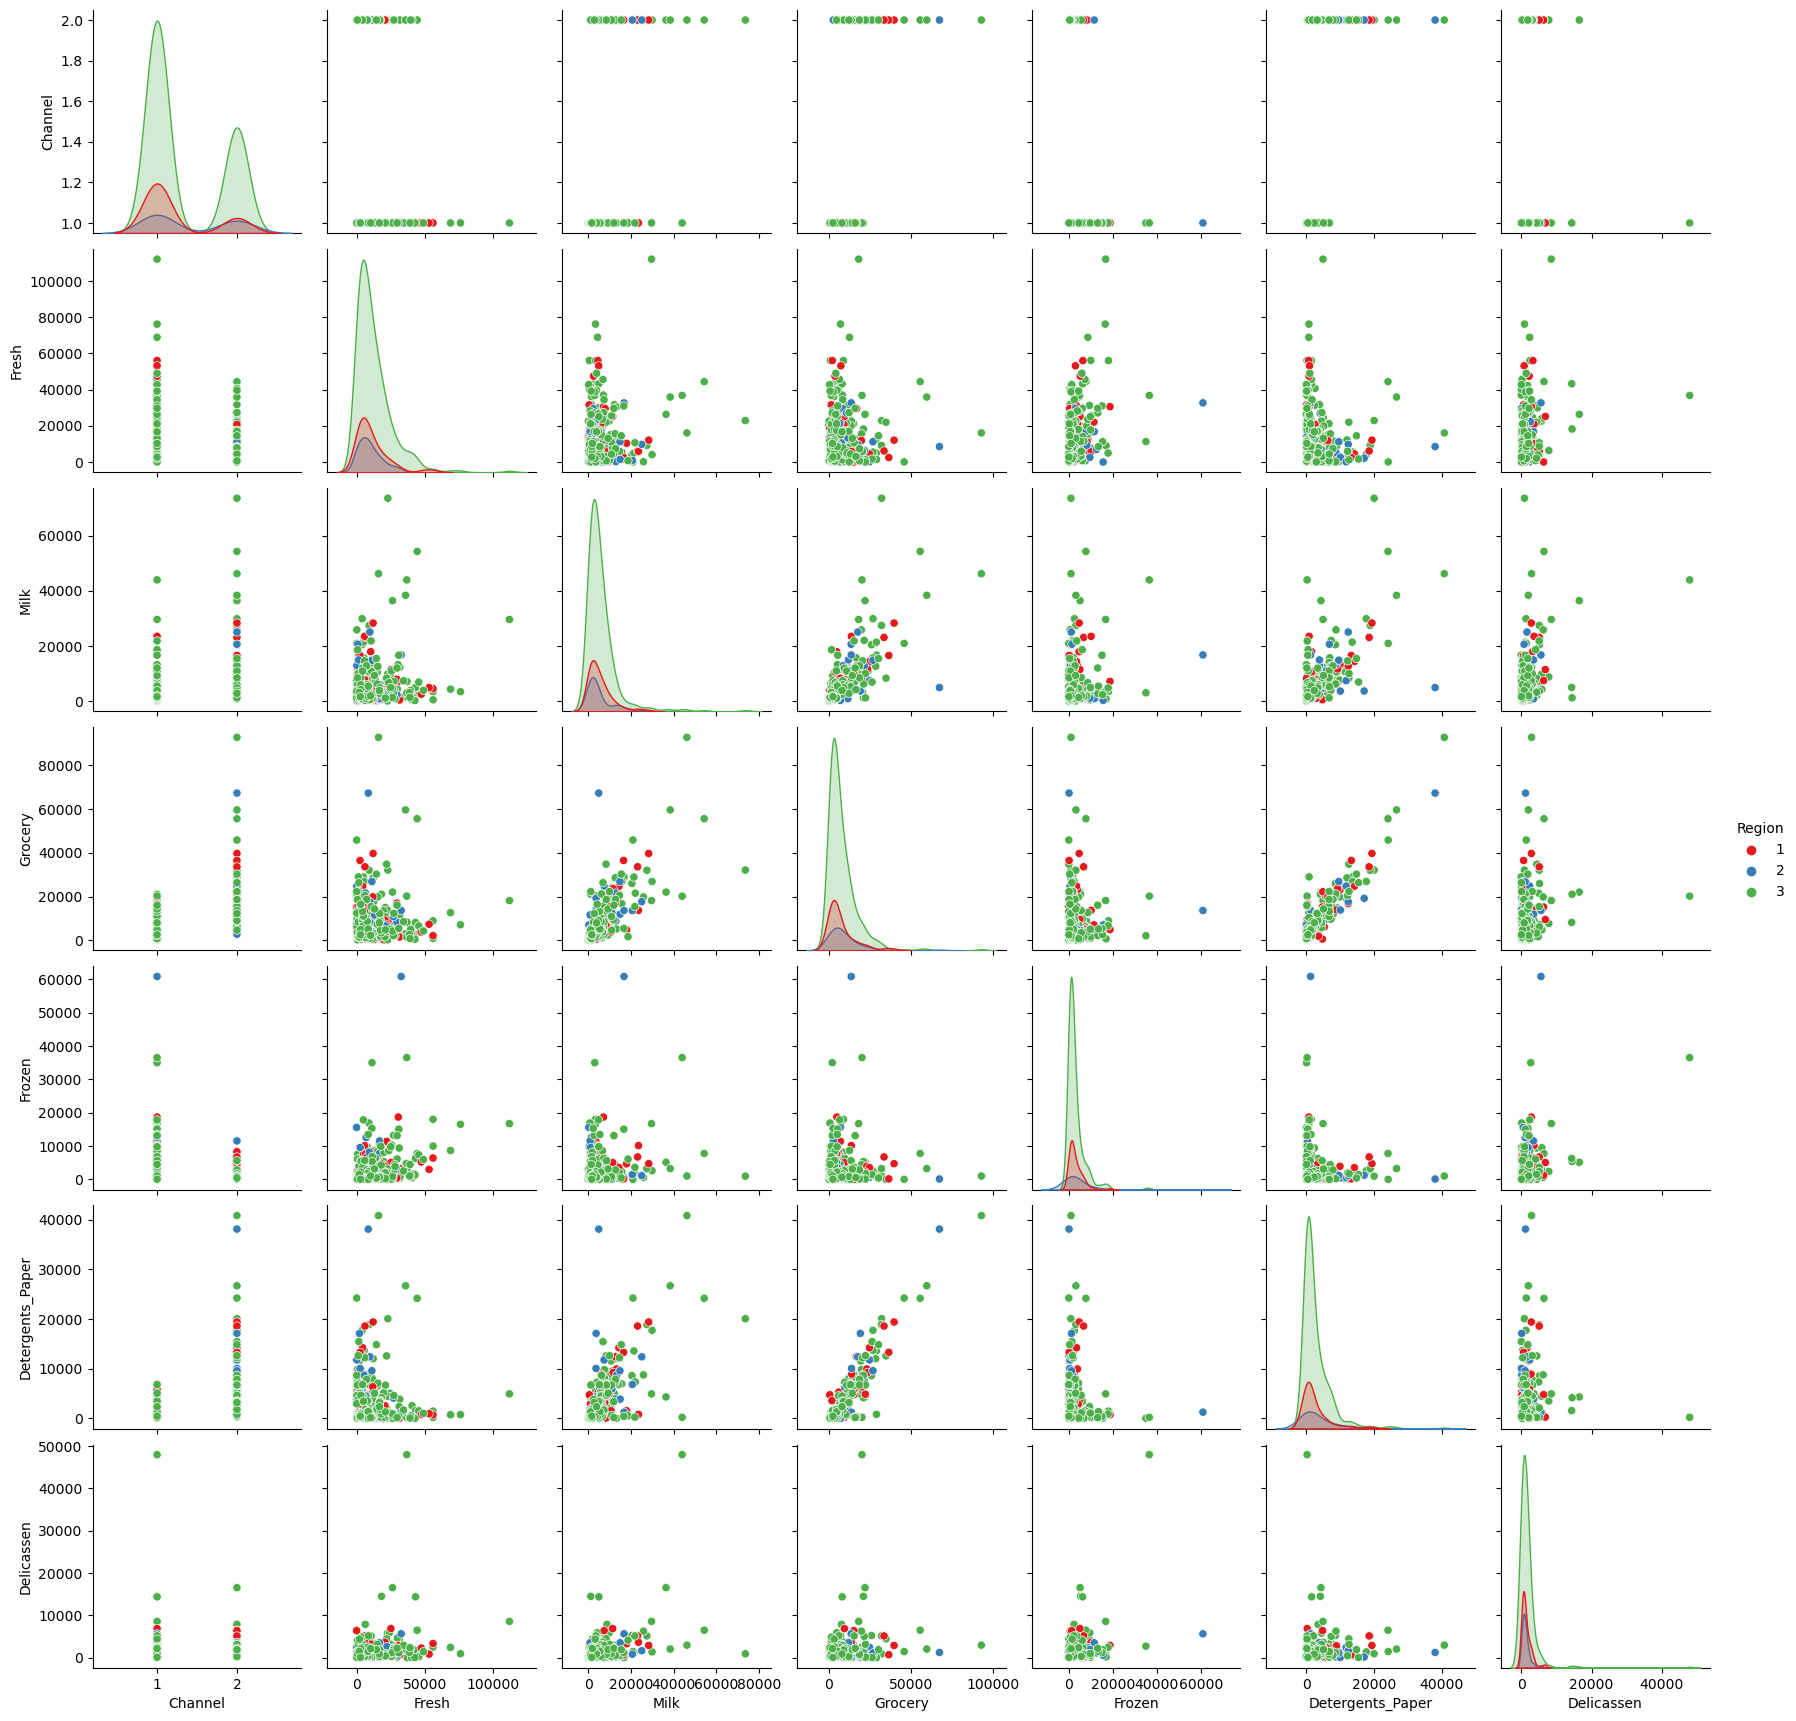

In [22]:
# PairPlot of the dataframe, colored by Region.
sns.pairplot(data=df,hue='Region',diag_kind='kde',palette='Set1')

DBSCAN

In [23]:
# Since the values of the features are in different orders of magnitude, 
#Let's scale the data. Use StandardScaler to scale the data.

from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X=scaler.fit_transform(df)

In [29]:
X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [31]:
# I will Use DBSCAN and a for loop to create a variety of models testing different epsilon values. 
# I will Set min_samples equal to 2 times the number of features (i.e 16). During the loop, 
# keep track of and log the percentage of points that are outliers. 
# The values of epsilon which will be tested will be within the range of:
# np.linspace(0.001,3,50)


In [32]:
from sklearn.cluster import DBSCAN

In [38]:
outlier_percent=[]
outlier_numbers=[]

for eps in np.linspace(.001,3,50):
    dbscan=DBSCAN(eps=eps,min_samples=16)
    dbscan.fit(X)
    outlier_numbers.append(np.sum(dbscan.labels_==-1))
    outlier_percent.append(100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_))

Text(0.5, 0, 'Epsilon Value')

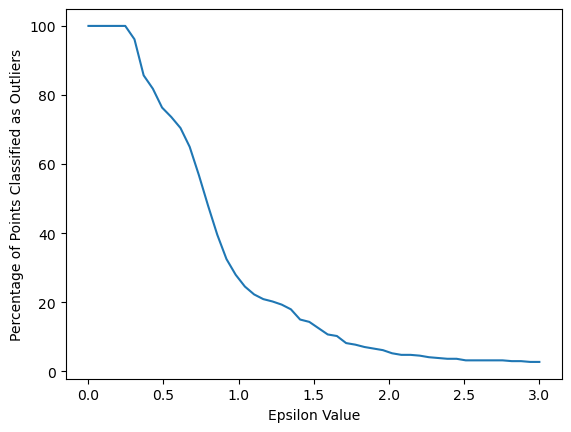

In [71]:
# Then, Create a line plot of the percentage of outlier points versus the epsilon value choice.

sns.lineplot(x=np.linspace(.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [53]:
dbscan=DBSCAN(eps=2,min_samples=16)

In [54]:
dbscan

DBSCAN(eps=2, min_samples=16)

In [55]:
dbscan.fit(X)

DBSCAN(eps=2, min_samples=16)

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

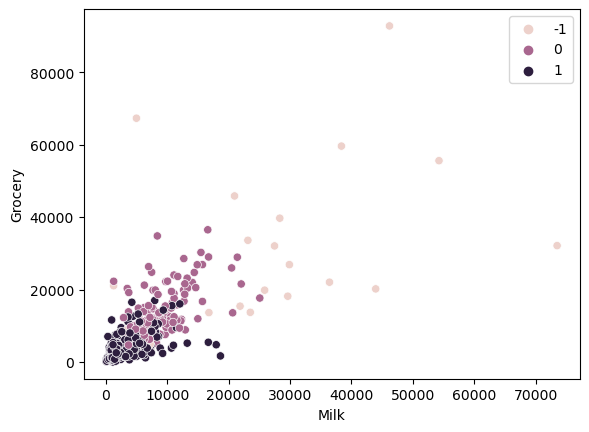

In [57]:
# Creat a catterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.

sns.scatterplot(data=df,x='Milk',y='Grocery',hue=dbscan.labels_)

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

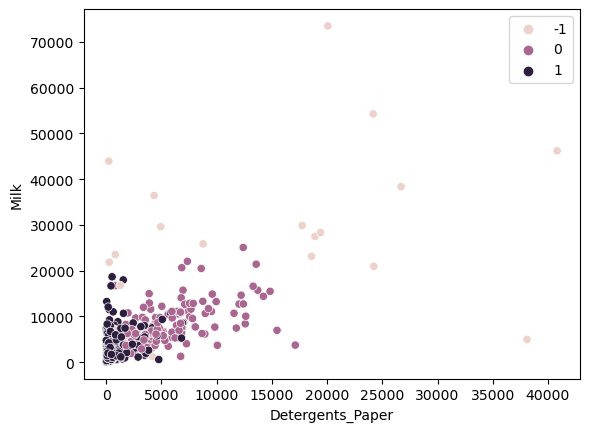

In [60]:
# Create a scatterplot of Milk vs. Detergents Paper colored by the labels.

sns.scatterplot(data=df,y='Milk',x='Detergents_Paper',hue=dbscan.labels_)

In [61]:
df['Labels']=dbscan.labels_

In [63]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [67]:
cat=df.drop(['Channel','Region'],axis=1)

In [69]:
cat_means = cat.groupby('Labels').mean()

In [70]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713
